In [1]:
# 11.1 Date and Time Data Types and Tools

from datetime import datetime
now = datetime.now()
now

datetime.datetime(2019, 5, 25, 19, 14, 23, 670277)

In [2]:
now.year

2019

In [3]:
now.month

5

In [4]:
now.day

25

In [5]:
delta = datetime(2011,1,7) - datetime(2008,6,25,8,15)
delta

datetime.timedelta(days=925, seconds=56700)

In [6]:
delta.days

925

In [7]:
delta.seconds

56700

In [8]:
from datetime import timedelta
start = datetime(2011,1,7)
start + timedelta(12)

datetime.datetime(2011, 1, 19, 0, 0)

In [9]:
start - 2 * timedelta(12)

datetime.datetime(2010, 12, 14, 0, 0)

In [10]:
# Converting Between String and Datetime

# You can format datetime objects and pandas Timestamp objects, which I’ll introduce
# later, as strings using str or the strftime method, passing a format specification
stamp =datetime(2011,1,7)
str(stamp)

'2011-01-07 00:00:00'

In [11]:
stamp.strftime('%Y-%m-%d')

'2011-01-07'

In [12]:
value = "2011-01-03"
datetime.strptime(value, '%Y-%m-%d')

datetime.datetime(2011, 1, 3, 0, 0)

In [13]:
value = "2011-23-03"
datetime.strptime(value, '%Y-%d-%m')

datetime.datetime(2011, 3, 23, 0, 0)

In [15]:
datestrs = ['7/6/2011', '8/6/2011']
[datetime.strptime(x, '%m/%d/%Y') for x in datestrs]

[datetime.datetime(2011, 7, 6, 0, 0), datetime.datetime(2011, 8, 6, 0, 0)]

In [17]:
# use the parser.parse method in the third-party dateutil package (this is installed automatically when you install pandas)

from dateutil.parser import parse
parse('2011-01-23')

datetime.datetime(2011, 1, 23, 0, 0)

In [18]:
parse('Jan 31, 1997 10:45 AM')

datetime.datetime(1997, 1, 31, 10, 45)

In [19]:
parse('6/12/2011', dayfirst = True)

datetime.datetime(2011, 12, 6, 0, 0)

In [23]:
parse('6/12/2011', dayfirst = False)

datetime.datetime(2011, 6, 12, 0, 0)

In [25]:
import pandas as pd

datestrs = ['2011-07-06 12:00:00', '2012-03-23 00:00:00']
pd.to_datetime(datestrs)

DatetimeIndex(['2011-07-06 12:00:00', '2012-03-23 00:00:00'], dtype='datetime64[ns]', freq=None)

In [34]:
idx = pd.to_datetime(datestrs + [None])
idx

DatetimeIndex(['2011-07-06 12:00:00', '2012-03-23 00:00:00', 'NaT'], dtype='datetime64[ns]', freq=None)

In [35]:
pd.isnull(idx)

array([False, False,  True])

In [28]:
idx = pd.to_datetime(datestrs + ['2002-04-12 00:00:00'])
idx

DatetimeIndex(['2011-07-06 12:00:00', '2012-03-23 00:00:00',
               '2002-04-12 00:00:00'],
              dtype='datetime64[ns]', freq=None)

In [30]:
idx = pd.to_datetime(datestrs + ['2020-04-12 00:00:00'])
idx

DatetimeIndex(['2011-07-06 12:00:00', '2012-03-23 00:00:00',
               '2020-04-12 00:00:00'],
              dtype='datetime64[ns]', freq=None)

In [31]:
idx[2]

Timestamp('2020-04-12 00:00:00')

In [32]:
idx[1]

Timestamp('2012-03-23 00:00:00')

In [33]:
pd.isnull(idx)

array([False, False, False])

In [37]:
# 11.2 Time Series Basics

import numpy as np

from datetime import datetime
dates = [datetime(2011,1,2), datetime(2011,1,5), datetime(2011,1,8), datetime(2011,1,11),\
         datetime(2011,1,14),datetime(2011,1,17)]
ts = pd.Series(np.random.randn(6), index = dates)
ts

2011-01-02   -1.030273
2011-01-05   -0.166888
2011-01-08    1.575769
2011-01-11    0.611947
2011-01-14   -0.736631
2011-01-17    0.455496
dtype: float64

In [38]:
ts.index

DatetimeIndex(['2011-01-02', '2011-01-05', '2011-01-08', '2011-01-11',
               '2011-01-14', '2011-01-17'],
              dtype='datetime64[ns]', freq=None)

In [39]:
# arithmetic operations between differently indexed time series automatically align on the dates
# ts[::2] selects every second element in ts

ts + ts[::2]

2011-01-02   -2.060545
2011-01-05         NaN
2011-01-08    3.151538
2011-01-11         NaN
2011-01-14   -1.473263
2011-01-17         NaN
dtype: float64

In [40]:
ts.index.dtype

dtype('<M8[ns]')

In [42]:
stamp = ts.index[0]
stamp

Timestamp('2011-01-02 00:00:00')

In [44]:
# Indexing, Selection, Subsetting

stamp = ts.index[2]
stamp

Timestamp('2011-01-08 00:00:00')

In [45]:
ts[stamp]

1.5757687577922657

In [ ]:
ts['20110110']

In [50]:
longer_ts = pd.Series(np.random.randn(20), index = pd.date_range('1/1/2000', periods = 20))
longer_ts

2000-01-01    0.938021
2000-01-02    0.410299
2000-01-03   -0.648998
2000-01-04   -2.072667
2000-01-05    1.997682
2000-01-06   -0.706890
2000-01-07    1.110266
2000-01-08   -1.460187
2000-01-09   -0.182517
2000-01-10   -0.506749
2000-01-11   -0.112311
2000-01-12    0.829085
2000-01-13   -0.195725
2000-01-14   -0.156210
2000-01-15   -0.406307
2000-01-16    0.311721
2000-01-17   -1.293228
2000-01-18    0.333294
2000-01-19    0.924953
2000-01-20    0.179351
Freq: D, dtype: float64

In [ ]:
longer_ts['2001']

In [52]:
ts[datetime(2011, 1, 7):]

2011-01-08    1.575769
2011-01-11    0.611947
2011-01-14   -0.736631
2011-01-17    0.455496
dtype: float64

In [56]:
ts

2011-01-02   -1.030273
2011-01-05   -0.166888
2011-01-08    1.575769
2011-01-11    0.611947
2011-01-14   -0.736631
2011-01-17    0.455496
dtype: float64

In [58]:
ts['1/6/2011':'1/11/2011']

2011-01-08    1.575769
2011-01-11    0.611947
dtype: float64

In [60]:
ts.truncate(after='1/9/2011')

2011-01-02   -1.030273
2011-01-05   -0.166888
2011-01-08    1.575769
dtype: float64

In [61]:
dates = pd.date_range('1/1/2000', periods=100, freq='W-WED')
long_df = pd.DataFrame(np.random.randn(100, 4), index=dates, columns=['Colorado', 'Texas', 'New York', 'Ohio'])
long_df.loc['5-2001']

,Colorado,Texas,New York,Ohio
2001-05-02,0.084331,-0.112821,-1.192237,0.969148
2001-05-09,1.221285,-0.461068,-0.912681,-0.567624
2001-05-16,0.407068,-0.270161,-0.930921,-0.112052
2001-05-23,0.607559,0.643646,-1.374300,-0.149511
2001-05-30,-0.496134,-0.334126,0.020461,-0.084110


In [62]:
# Time Series with Duplicate Indices

dates = pd.DatetimeIndex(['1/1/2000', '1/2/2000', '1/2/2000', '1/2/2000', '1/3/2000'])
dup_ts = pd.Series(np.arange(5), index=dates)
dup_ts 

2000-01-01    0
2000-01-02    1
2000-01-02    2
2000-01-02    3
2000-01-03    4
dtype: int32

In [63]:
dup_ts.index.is_unique

False

In [64]:
 dup_ts['1/3/2000'] # not duplicated

4

In [65]:
dup_ts['1/2/2000'] # duplicated

2000-01-02    1
2000-01-02    2
2000-01-02    3
dtype: int32

In [66]:
grouped = dup_ts.groupby(level=0)
grouped.mean()

2000-01-01    0
2000-01-02    2
2000-01-03    4
dtype: int32

In [67]:
grouped.count()

2000-01-01    1
2000-01-02    3
2000-01-03    1
dtype: int64

In [68]:
# 11.3 Date Ranges, Frequencies, and Shifting

ts

2011-01-02   -1.030273
2011-01-05   -0.166888
2011-01-08    1.575769
2011-01-11    0.611947
2011-01-14   -0.736631
2011-01-17    0.455496
dtype: float64

In [69]:
resampler = ts.resample('D')
resampler

DatetimeIndexResampler [freq=<Day>, axis=0, closed=left, label=left, convention=start, base=0]

In [71]:
# Generating Date Ranges

index = pd.date_range('2012-04-01', '2012-05-01')
index

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20',
               '2012-04-21', '2012-04-22', '2012-04-23', '2012-04-24',
               '2012-04-25', '2012-04-26', '2012-04-27', '2012-04-28',
               '2012-04-29', '2012-04-30', '2012-05-01'],
              dtype='datetime64[ns]', freq='D')

In [72]:
pd.date_range(start='2012-04-01', periods=20)

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20'],
              dtype='datetime64[ns]', freq='D')

In [73]:
pd.date_range(end='2012-06-01', periods=20)

DatetimeIndex(['2012-05-13', '2012-05-14', '2012-05-15', '2012-05-16',
               '2012-05-17', '2012-05-18', '2012-05-19', '2012-05-20',
               '2012-05-21', '2012-05-22', '2012-05-23', '2012-05-24',
               '2012-05-25', '2012-05-26', '2012-05-27', '2012-05-28',
               '2012-05-29', '2012-05-30', '2012-05-31', '2012-06-01'],
              dtype='datetime64[ns]', freq='D')

In [74]:
#  a date index containing the last business day of each month, you would pass the 'BM' frequency

pd.date_range('2000-01-01', '2000-12-01', freq='BM')

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-28',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-29', '2000-10-31', '2000-11-30'],
              dtype='datetime64[ns]', freq='BM')

In [75]:
pd.date_range('2012-05-02 12:56:31', periods=5)

DatetimeIndex(['2012-05-02 12:56:31', '2012-05-03 12:56:31',
               '2012-05-04 12:56:31', '2012-05-05 12:56:31',
               '2012-05-06 12:56:31'],
              dtype='datetime64[ns]', freq='D')

In [76]:
#  start or end dates with time information but want to generate 
# a set of timestamps normalized to midnight as a convention

pd.date_range('2012-05-02 12:56:31', periods=5, normalize=True)

DatetimeIndex(['2012-05-02', '2012-05-03', '2012-05-04', '2012-05-05',
               '2012-05-06'],
              dtype='datetime64[ns]', freq='D')

In [79]:
# Frequencies and Date Oﬀsets

from pandas.tseries.offsets import Hour, Minute
hour = Hour()
hour

<Hour>

In [81]:
four_hours = Hour(4)
four_hours

<4 * Hours>

In [82]:
pd.date_range('2000-01-01', '2000-01-03 23:59', freq='4h')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 04:00:00',
               '2000-01-01 08:00:00', '2000-01-01 12:00:00',
               '2000-01-01 16:00:00', '2000-01-01 20:00:00',
               '2000-01-02 00:00:00', '2000-01-02 04:00:00',
               '2000-01-02 08:00:00', '2000-01-02 12:00:00',
               '2000-01-02 16:00:00', '2000-01-02 20:00:00',
               '2000-01-03 00:00:00', '2000-01-03 04:00:00',
               '2000-01-03 08:00:00', '2000-01-03 12:00:00',
               '2000-01-03 16:00:00', '2000-01-03 20:00:00'],
              dtype='datetime64[ns]', freq='4H')

In [83]:
Hour(2) + Minute(30)

<150 * Minutes>

In [84]:
pd.date_range('2000-01-01', periods=10, freq='1h30min')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 01:30:00',
               '2000-01-01 03:00:00', '2000-01-01 04:30:00',
               '2000-01-01 06:00:00', '2000-01-01 07:30:00',
               '2000-01-01 09:00:00', '2000-01-01 10:30:00',
               '2000-01-01 12:00:00', '2000-01-01 13:30:00'],
              dtype='datetime64[ns]', freq='90T')

In [85]:
# Week of month dates

# One useful frequency class is “week of month,” starting with WOM. This enables you to
# get dates like the third Friday of each month

rng = pd.date_range('2012-01-01', '2012-09-01', freq='WOM-3FRI')
list(rng)

[Timestamp('2012-01-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-02-17 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-03-16 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-04-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-05-18 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-06-15 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-07-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-08-17 00:00:00', freq='WOM-3FRI')]

In [86]:
#　　Shifting (Leading and Lagging) Data

ts = pd.Series(np.random.randn(4),\
index=pd.date_range('1/1/2000', periods=4, freq='M'))
ts

2000-01-31    1.356575
2000-02-29   -0.163859
2000-03-31   -1.352101
2000-04-30    1.232205
Freq: M, dtype: float64

In [87]:
# “Shifting” refers to moving data backward and forward through time. Both Series and
#　DataFrame have a shift method for doing naive shifts forward or backward

ts.shift(2)

2000-01-31         NaN
2000-02-29         NaN
2000-03-31    1.356575
2000-04-30   -0.163859
Freq: M, dtype: float64

In [88]:
ts.shift(-2)

2000-01-31   -1.352101
2000-02-29    1.232205
2000-03-31         NaN
2000-04-30         NaN
Freq: M, dtype: float64

In [89]:
ts.shift(2, freq='M')

2000-03-31    1.356575
2000-04-30   -0.163859
2000-05-31   -1.352101
2000-06-30    1.232205
Freq: M, dtype: float64

In [90]:
ts.shift(3, freq='D')

2000-02-03    1.356575
2000-03-03   -0.163859
2000-04-03   -1.352101
2000-05-03    1.232205
dtype: float64

In [91]:
ts.shift(1, freq='90T')

2000-01-31 01:30:00    1.356575
2000-02-29 01:30:00   -0.163859
2000-03-31 01:30:00   -1.352101
2000-04-30 01:30:00    1.232205
Freq: M, dtype: float64

In [92]:
# Shifting dates with oﬀsets

from pandas.tseries.offsets import Day, MonthEnd
now = datetime(2011, 11, 17)
now

datetime.datetime(2011, 11, 17, 0, 0)

In [93]:
now + MonthEnd()

Timestamp('2011-11-30 00:00:00')

In [94]:
now + MonthEnd(2)

Timestamp('2011-12-31 00:00:00')

In [95]:
# Anchored offsets can explicitly “roll” dates forward or backward by simply using their
# rollforward and rollback methods

offset = MonthEnd()
offset.rollforward(now)

Timestamp('2011-11-30 00:00:00')

In [96]:
offset.rollback(now)

Timestamp('2011-10-31 00:00:00')

In [98]:
ts = pd.Series(np.random.randn(10),\
index=pd.date_range('1/15/2000', periods=10, freq='4d'))
ts

2000-01-15    0.790079
2000-01-19    2.368644
2000-01-23    2.111074
2000-01-27    0.832645
2000-01-31    0.679772
2000-02-04   -0.151130
2000-02-08   -0.782687
2000-02-12    1.433332
2000-02-16    1.259290
2000-02-20   -1.815941
Freq: 4D, dtype: float64

In [99]:
ts.groupby(offset.rollforward).mean()

2000-01-31    1.356443
2000-02-29   -0.011427
dtype: float64

In [100]:
ts.resample('M').mean()

2000-01-31    1.356443
2000-02-29   -0.011427
Freq: M, dtype: float64

In [101]:
# 11.4 Time Zone Handling

import pytz
pytz.common_timezones[-5:]

['US/Eastern', 'US/Hawaii', 'US/Mountain', 'US/Pacific', 'UTC']

In [102]:
tz = pytz.timezone('America/New_York')
tz

<DstTzInfo 'America/New_York' LMT-1 day, 19:04:00 STD>

In [103]:
# Time Zone Localization and Conversion

rng = pd.date_range('3/9/2012 9:30', periods=6, freq='D')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-03-09 09:30:00    0.077206
2012-03-10 09:30:00    1.516157
2012-03-11 09:30:00    0.211248
2012-03-12 09:30:00    1.118146
2012-03-13 09:30:00   -1.934071
2012-03-14 09:30:00   -0.515805
Freq: D, dtype: float64

In [104]:
print(ts.index.tz)

None


In [105]:
pd.date_range('3/9/2012 9:30', periods=10, freq='D', tz='UTC')

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00', '2012-03-16 09:30:00+00:00',
               '2012-03-17 09:30:00+00:00', '2012-03-18 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [106]:
ts

2012-03-09 09:30:00    0.077206
2012-03-10 09:30:00    1.516157
2012-03-11 09:30:00    0.211248
2012-03-12 09:30:00    1.118146
2012-03-13 09:30:00   -1.934071
2012-03-14 09:30:00   -0.515805
Freq: D, dtype: float64

In [107]:
ts_utc = ts.tz_localize('UTC')
ts_utc 

2012-03-09 09:30:00+00:00    0.077206
2012-03-10 09:30:00+00:00    1.516157
2012-03-11 09:30:00+00:00    0.211248
2012-03-12 09:30:00+00:00    1.118146
2012-03-13 09:30:00+00:00   -1.934071
2012-03-14 09:30:00+00:00   -0.515805
Freq: D, dtype: float64

In [108]:
ts_utc.index

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [109]:
ts_utc.tz_convert('America/New_York')

2012-03-09 04:30:00-05:00    0.077206
2012-03-10 04:30:00-05:00    1.516157
2012-03-11 05:30:00-04:00    0.211248
2012-03-12 05:30:00-04:00    1.118146
2012-03-13 05:30:00-04:00   -1.934071
2012-03-14 05:30:00-04:00   -0.515805
Freq: D, dtype: float64

In [110]:
ts_eastern = ts.tz_localize('America/New_York')
ts_eastern.tz_convert('UTC')

2012-03-09 14:30:00+00:00    0.077206
2012-03-10 14:30:00+00:00    1.516157
2012-03-11 13:30:00+00:00    0.211248
2012-03-12 13:30:00+00:00    1.118146
2012-03-13 13:30:00+00:00   -1.934071
2012-03-14 13:30:00+00:00   -0.515805
Freq: D, dtype: float64

In [111]:
ts_eastern.tz_convert('Europe/Berlin')

2012-03-09 15:30:00+01:00    0.077206
2012-03-10 15:30:00+01:00    1.516157
2012-03-11 14:30:00+01:00    0.211248
2012-03-12 14:30:00+01:00    1.118146
2012-03-13 14:30:00+01:00   -1.934071
2012-03-14 14:30:00+01:00   -0.515805
Freq: D, dtype: float64

In [112]:
ts.index.tz_localize('Asia/Shanghai')

DatetimeIndex(['2012-03-09 09:30:00+08:00', '2012-03-10 09:30:00+08:00',
               '2012-03-11 09:30:00+08:00', '2012-03-12 09:30:00+08:00',
               '2012-03-13 09:30:00+08:00', '2012-03-14 09:30:00+08:00'],
              dtype='datetime64[ns, Asia/Shanghai]', freq='D')

In [3]:
#  Operations with Time Zone−Aware Timestamp Objects
import pandas as pd
stamp = pd.Timestamp('2011-03-12 04:00')
stamp_utc = stamp.tz_localize('utc')
stamp_utc.tz_convert('America/New_York')

Timestamp('2011-03-11 23:00:00-0500', tz='America/New_York')

In [4]:
stamp_moscow = pd.Timestamp('2011-03-12 04:00', tz='Europe/Moscow')
stamp_moscow

Timestamp('2011-03-12 04:00:00+0300', tz='Europe/Moscow')

In [5]:
stamp_utc.value

1299902400000000000

In [6]:
stamp_utc.tz_convert('America/New_York').value

1299902400000000000

In [7]:
from pandas.tseries.offsets import Hour
stamp = pd.Timestamp('2012-03-12 01:30', tz='US/Eastern')
stamp

Timestamp('2012-03-12 01:30:00-0400', tz='US/Eastern')

In [8]:
stamp + Hour()

Timestamp('2012-03-12 02:30:00-0400', tz='US/Eastern')

In [9]:
stamp = pd.Timestamp('2012-11-04 00:30', tz='US/Eastern')
stamp

Timestamp('2012-11-04 00:30:00-0400', tz='US/Eastern')

In [10]:
stamp + 2 * Hour()

Timestamp('2012-11-04 01:30:00-0500', tz='US/Eastern')

In [13]:
# Operations Between Diﬀerent Time Zones

import numpy as np

rng = pd.date_range('3/7/2012 9:30', periods=10, freq='B')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-03-07 09:30:00    2.026847
2012-03-08 09:30:00    0.378920
2012-03-09 09:30:00    1.246097
2012-03-12 09:30:00    0.287733
2012-03-13 09:30:00    0.205365
2012-03-14 09:30:00    1.761835
2012-03-15 09:30:00    0.134094
2012-03-16 09:30:00    0.159229
2012-03-19 09:30:00    1.455243
2012-03-20 09:30:00    0.558374
Freq: B, dtype: float64

In [15]:
ts1 = ts[:7].tz_localize('Europe/London')
ts2 = ts1[2:].tz_convert('Europe/Moscow')
result = ts1 + ts2

In [16]:
result.index

DatetimeIndex(['2012-03-07 09:30:00+00:00', '2012-03-08 09:30:00+00:00',
               '2012-03-09 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='B')

In [17]:
# 11.5 Periods and Period Arithmetic

p = pd.Period(2007, freq='A-DEC')
p

Period('2007', 'A-DEC')

In [18]:
p + 5

Period('2012', 'A-DEC')

In [19]:
p - 2

Period('2005', 'A-DEC')

In [20]:
pd.Period('2014', freq='A-DEC') - p

<7 * YearEnds: month=12>

In [21]:
rng = pd.period_range('2000-01-01', '2000-06-30', freq='M')
rng

PeriodIndex(['2000-01', '2000-02', '2000-03', '2000-04', '2000-05', '2000-06'], dtype='period[M]', freq='M')

In [22]:
pd.Series(np.random.randn(6), index=rng)

2000-01   -0.048059
2000-02    0.115216
2000-03   -1.842245
2000-04    1.612708
2000-05   -0.589395
2000-06   -0.083404
Freq: M, dtype: float64

In [23]:
values = ['2001Q3', '2002Q2', '2003Q1']
index = pd.PeriodIndex(values, freq='Q-DEC')
index

PeriodIndex(['2001Q3', '2002Q2', '2003Q1'], dtype='period[Q-DEC]', freq='Q-DEC')

In [24]:
# Period Frequency Conversion

p = pd.Period('2007', freq='A-DEC')
p

Period('2007', 'A-DEC')

In [25]:
p.asfreq('M', how = 'start')

Period('2007-01', 'M')

In [26]:
p.asfreq('M', how='end')

Period('2007-12', 'M')

In [27]:
p = pd.Period('2007', freq='A-JUN')
p

Period('2007', 'A-JUN')

In [28]:
p.asfreq('M', 'start')

Period('2006-07', 'M')

In [29]:
p = pd.Period('Aug-2007', 'M')
p.asfreq('A-JUN')

Period('2008', 'A-JUN')

In [30]:
# Converting Timestamps to Periods (and Back)

rng = pd.date_range('2000-01-01', periods=3, freq='M')
ts = pd.Series(np.random.randn(3), index=rng)
ts

2000-01-31   -0.172605
2000-02-29    0.229796
2000-03-31   -2.119790
Freq: M, dtype: float64

In [31]:
pts = ts.to_period()
pts

2000-01   -0.172605
2000-02    0.229796
2000-03   -2.119790
Freq: M, dtype: float64

In [32]:
rng = pd.date_range('1/29/2000', periods=6, freq='D')
ts2 = pd.Series(np.random.randn(6), index=rng)
ts2

2000-01-29   -0.810189
2000-01-30   -2.053169
2000-01-31    0.112847
2000-02-01   -0.004505
2000-02-02   -1.111720
2000-02-03    0.631467
Freq: D, dtype: float64

In [33]:
ts2.to_period('M')

2000-01   -0.810189
2000-01   -2.053169
2000-01    0.112847
2000-02   -0.004505
2000-02   -1.111720
2000-02    0.631467
Freq: M, dtype: float64

In [35]:
pts = ts2.to_period()
pts

2000-01-29   -0.810189
2000-01-30   -2.053169
2000-01-31    0.112847
2000-02-01   -0.004505
2000-02-02   -1.111720
2000-02-03    0.631467
Freq: D, dtype: float64

In [39]:
ts2.to_period('d')

2000-01-29   -0.810189
2000-01-30   -2.053169
2000-01-31    0.112847
2000-02-01   -0.004505
2000-02-02   -1.111720
2000-02-03    0.631467
Freq: D, dtype: float64

In [40]:
pts.to_timestamp(how='end')

2000-01-29 23:59:59.999999999   -0.810189
2000-01-30 23:59:59.999999999   -2.053169
2000-01-31 23:59:59.999999999    0.112847
2000-02-01 23:59:59.999999999   -0.004505
2000-02-02 23:59:59.999999999   -1.111720
2000-02-03 23:59:59.999999999    0.631467
Freq: D, dtype: float64

In [41]:
# Creating a PeriodIndex from Arrays

data = pd.read_csv(r'H:/Python/Examples/examples_data_for_data_analysis/macrodata.csv')
data.head(5)

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [45]:
data.year

0      1959.0
1      1959.0
2      1959.0
3      1959.0
4      1960.0
5      1960.0
6      1960.0
7      1960.0
8      1961.0
9      1961.0
10     1961.0
11     1961.0
12     1962.0
13     1962.0
14     1962.0
15     1962.0
16     1963.0
17     1963.0
18     1963.0
19     1963.0
20     1964.0
21     1964.0
22     1964.0
23     1964.0
24     1965.0
25     1965.0
26     1965.0
27     1965.0
28     1966.0
29     1966.0
        ...  
173    2002.0
174    2002.0
175    2002.0
176    2003.0
177    2003.0
178    2003.0
179    2003.0
180    2004.0
181    2004.0
182    2004.0
183    2004.0
184    2005.0
185    2005.0
186    2005.0
187    2005.0
188    2006.0
189    2006.0
190    2006.0
191    2006.0
192    2007.0
193    2007.0
194    2007.0
195    2007.0
196    2008.0
197    2008.0
198    2008.0
199    2008.0
200    2009.0
201    2009.0
202    2009.0
Name: year, Length: 203, dtype: float64

In [46]:
data.quarter

0      1.0
1      2.0
2      3.0
3      4.0
4      1.0
5      2.0
6      3.0
7      4.0
8      1.0
9      2.0
10     3.0
11     4.0
12     1.0
13     2.0
14     3.0
15     4.0
16     1.0
17     2.0
18     3.0
19     4.0
20     1.0
21     2.0
22     3.0
23     4.0
24     1.0
25     2.0
26     3.0
27     4.0
28     1.0
29     2.0
      ... 
173    2.0
174    3.0
175    4.0
176    1.0
177    2.0
178    3.0
179    4.0
180    1.0
181    2.0
182    3.0
183    4.0
184    1.0
185    2.0
186    3.0
187    4.0
188    1.0
189    2.0
190    3.0
191    4.0
192    1.0
193    2.0
194    3.0
195    4.0
196    1.0
197    2.0
198    3.0
199    4.0
200    1.0
201    2.0
202    3.0
Name: quarter, Length: 203, dtype: float64

In [48]:
index = pd.PeriodIndex(year=data.year, quarter=data.quarter,
.....: freq='Q-DEC')
index

PeriodIndex(['1959Q1', '1959Q2', '1959Q3', '1959Q4', '1960Q1', '1960Q2',
             '1960Q3', '1960Q4', '1961Q1', '1961Q2',
             ...
             '2007Q2', '2007Q3', '2007Q4', '2008Q1', '2008Q2', '2008Q3',
             '2008Q4', '2009Q1', '2009Q2', '2009Q3'],
            dtype='period[Q-DEC]', length=203, freq='Q-DEC')

In [49]:
data.index = index
data.infl

1959Q1    0.00
1959Q2    2.34
1959Q3    2.74
1959Q4    0.27
1960Q1    2.31
1960Q2    0.14
1960Q3    2.70
1960Q4    1.21
1961Q1   -0.40
1961Q2    1.47
1961Q3    0.80
1961Q4    0.80
1962Q1    2.26
1962Q2    0.13
1962Q3    2.11
1962Q4    0.79
1963Q1    0.53
1963Q2    2.75
1963Q3    0.78
1963Q4    2.46
1964Q1    0.13
1964Q2    0.90
1964Q3    1.29
1964Q4    2.05
1965Q1    1.28
1965Q2    2.54
1965Q3    0.89
1965Q4    2.90
1966Q1    4.99
1966Q2    2.10
          ... 
2002Q2    1.56
2002Q3    2.66
2002Q4    3.08
2003Q1    1.31
2003Q2    1.09
2003Q3    2.60
2003Q4    3.02
2004Q1    2.35
2004Q2    3.61
2004Q3    3.58
2004Q4    2.09
2005Q1    4.15
2005Q2    1.85
2005Q3    9.14
2005Q4    0.40
2006Q1    2.60
2006Q2    3.97
2006Q3   -1.58
2006Q4    3.30
2007Q1    4.58
2007Q2    2.75
2007Q3    3.45
2007Q4    6.38
2008Q1    2.82
2008Q2    8.53
2008Q3   -3.16
2008Q4   -8.79
2009Q1    0.94
2009Q2    3.37
2009Q3    3.56
Freq: Q-DEC, Name: infl, Length: 203, dtype: float64

In [50]:
# 11.6 Resampling and Frequency Conversion

rng = pd.date_range('2000-01-01', periods=100, freq='D')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2000-01-01   -0.367787
2000-01-02   -0.182333
2000-01-03    0.793815
2000-01-04   -0.864189
2000-01-05    0.703651
2000-01-06    0.162603
2000-01-07    0.733327
2000-01-08    0.136373
2000-01-09   -0.332347
2000-01-10   -1.555751
2000-01-11   -0.423570
2000-01-12   -0.445369
2000-01-13   -0.050906
2000-01-14   -0.798649
2000-01-15   -1.059358
2000-01-16    0.069432
2000-01-17   -0.340347
2000-01-18    0.639748
2000-01-19    0.774581
2000-01-20   -0.509585
2000-01-21    0.391176
2000-01-22    1.188964
2000-01-23    0.198316
2000-01-24    0.702174
2000-01-25   -0.769260
2000-01-26    0.767467
2000-01-27    1.517734
2000-01-28   -1.384235
2000-01-29   -0.641043
2000-01-30   -0.585398
                ...   
2000-03-11   -0.319979
2000-03-12    0.676216
2000-03-13   -1.156173
2000-03-14   -0.863886
2000-03-15   -0.837101
2000-03-16   -1.686781
2000-03-17   -0.250152
2000-03-18    0.133759
2000-03-19    2.477576
2000-03-20    1.831430
2000-03-21    1.306357
2000-03-22   -0.262333
2000-03-23 

In [51]:
ts.resample('M').mean()

2000-01-31   -0.066836
2000-02-29    0.046966
2000-03-31   -0.004503
2000-04-30   -0.021383
Freq: M, dtype: float64

In [52]:
ts.resample('M', kind='period').mean()

2000-01   -0.066836
2000-02    0.046966
2000-03   -0.004503
2000-04   -0.021383
Freq: M, dtype: float64

In [54]:
# Upsampling and Interpolation

frame = pd.DataFrame(np.random.randn(2, 4),\
 index=pd.date_range('1/1/2000', periods=2,\
 freq='W-WED'),\
 columns=['Colorado', 'Texas', 'New York', 'Ohio'])
frame

,Colorado,Texas,New York,Ohio
2000-01-05,-0.487502,-0.174573,-0.531629,0.871062
2000-01-12,-0.702506,1.176234,-0.808191,-1.199882


In [55]:
df_daily = frame.resample('D').asfreq()
df_daily

,Colorado,Texas,New York,Ohio
2000-01-05,-0.487502,-0.174573,-0.531629,0.871062
2000-01-06,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,-0.702506,1.176234,-0.808191,-1.199882


In [56]:
frame.resample('D').ffill()

,Colorado,Texas,New York,Ohio
2000-01-05,-0.487502,-0.174573,-0.531629,0.871062
2000-01-06,-0.487502,-0.174573,-0.531629,0.871062
2000-01-07,-0.487502,-0.174573,-0.531629,0.871062
2000-01-08,-0.487502,-0.174573,-0.531629,0.871062
2000-01-09,-0.487502,-0.174573,-0.531629,0.871062
2000-01-10,-0.487502,-0.174573,-0.531629,0.871062
2000-01-11,-0.487502,-0.174573,-0.531629,0.871062
2000-01-12,-0.702506,1.176234,-0.808191,-1.199882


In [57]:
frame.resample('D').ffill(limit=2)

,Colorado,Texas,New York,Ohio
2000-01-05,-0.487502,-0.174573,-0.531629,0.871062
2000-01-06,-0.487502,-0.174573,-0.531629,0.871062
2000-01-07,-0.487502,-0.174573,-0.531629,0.871062
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,-0.702506,1.176234,-0.808191,-1.199882


In [58]:
frame.resample('W-THU').ffill()

,Colorado,Texas,New York,Ohio
2000-01-06,-0.487502,-0.174573,-0.531629,0.871062
2000-01-13,-0.702506,1.176234,-0.808191,-1.199882


In [60]:
# Resampling with Periods

frame = pd.DataFrame(np.random.randn(24, 4),\
index=pd.period_range('1-2000', '12-2001',\
freq='M'),\
columns=['Colorado', 'Texas', 'New York', 'Ohio'])
frame[:5]

,Colorado,Texas,New York,Ohio
2000-01,-1.229409,-0.576343,0.856653,-0.432943
2000-02,0.096099,-0.712738,-0.988740,0.839190
2000-03,1.753206,0.990932,1.042003,-0.083797
2000-04,-1.662856,0.110281,0.378672,-0.428740
2000-05,1.451731,-0.909755,0.682539,-0.258489


In [61]:
annual_frame = frame.resample('A-DEC').mean()
annual_frame

,Colorado,Texas,New York,Ohio
2000,0.438778,-0.321722,0.016073,-0.019466
2001,-0.242356,-0.562481,-0.128128,-0.198243


In [63]:
# 11.7 Moving Window Functions

close_px_all = pd.read_csv(r'H:/Python/Examples/examples_data_for_data_analysis/stock_px_2.csv', parse_dates=True, index_col=0)
close_px = close_px_all[['AAPL', 'MSFT', 'XOM']]
close_px = close_px.resample('B').ffill()
close_px.AAPL.plot()

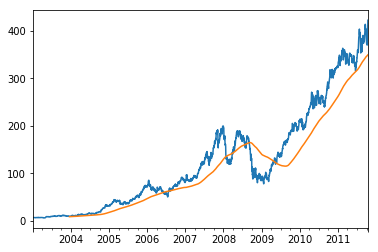

In [65]:
close_px.AAPL.plot()
close_px.AAPL.rolling(250).mean().plot()

In [66]:
appl_std250 = close_px.AAPL.rolling(250, min_periods=10).std()
appl_std250[5:12]

2003-01-09         NaN
2003-01-10         NaN
2003-01-13         NaN
2003-01-14         NaN
2003-01-15    0.077496
2003-01-16    0.074760
2003-01-17    0.112368
Freq: B, Name: AAPL, dtype: float64

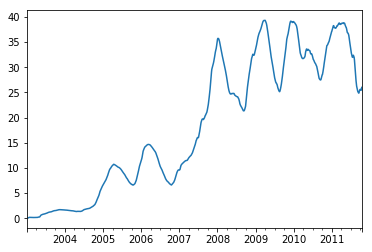

In [67]:
appl_std250.plot()

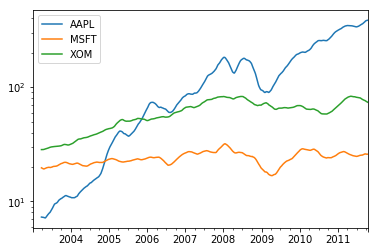

In [68]:
expanding_mean = appl_std250.expanding().mean()
close_px.rolling(60).mean().plot(logy=True)

In [69]:
close_px.rolling('20D').mean()

,AAPL,MSFT,XOM
2003-01-02,7.400000,21.110000,29.220000
2003-01-03,7.425000,21.125000,29.230000
2003-01-06,7.433333,21.256667,29.473333
2003-01-07,7.432500,21.425000,29.342500
2003-01-08,7.402000,21.402000,29.240000
2003-01-09,7.391667,21.490000,29.273333
2003-01-10,7.387143,21.558571,29.238571
2003-01-13,7.378750,21.633750,29.197500
2003-01-14,7.370000,21.717778,29.194444
2003-01-15,7.355000,21.757000,29.152000
